# 1.SWAP dynamics for zero detuning and large detuning

- Zero detuning:We comapre the DDE and WW solutions with exact TC model (Two qubit with one mode)
- Large detuning: We comapre the DDE and WW solutions with approximation TC model (Two qubit with infinite modes) via SW perturbation
  
**Conclusion**:
- The DDE provides a good approximation to the WW model at all coupling strengths (maily refers weak coupling), and in the weak-coupling regime($g \ll FSR$) it can reproduce the dynamics of the Rabi model. 
- In the large-detuning regime, where the Rabi model itself is no longer valid, the DDE can still reproduce the second-order perturbative results of the Tavis–Cummings (TC) model.


Finished TC sim


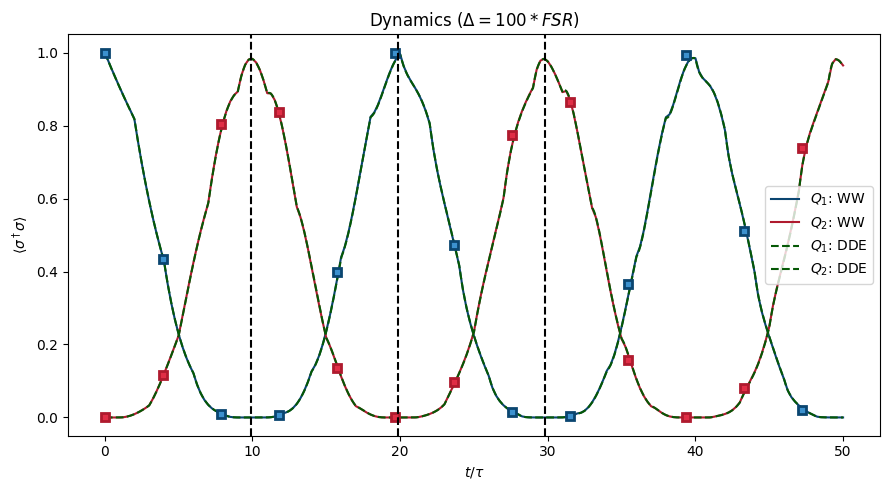

In [7]:
from expt_sets import expt_001_dynamics
import numpy as np

expt_001_dynamics(
    Delta=100, gamma=0.1, tau=1, T=50, dt_max=0.01, n_steps=201, n_modes=100
)

# 3. Swap speed and Fidelity
## 3.1 Study the speed and fidelity
Above, we found that two qubits can be passively swapped. 
Here, we will test the speed and fidelity of the swap.

**Conclusion** : 
- Because our DDE dynamics is piecewise-defined, if the Rabi frequency is not an integer multiple of τ, the position of the maximum fidelity in the DDE model will be mismatched and shifted relative to that in the Rabi model. This is why the speed follows the Rabi-frequency trend but exhibits oscillatory fluctuations, and also why the fidelity shows corresponding up-and-down variations.

[load] expt_002_cache.npz


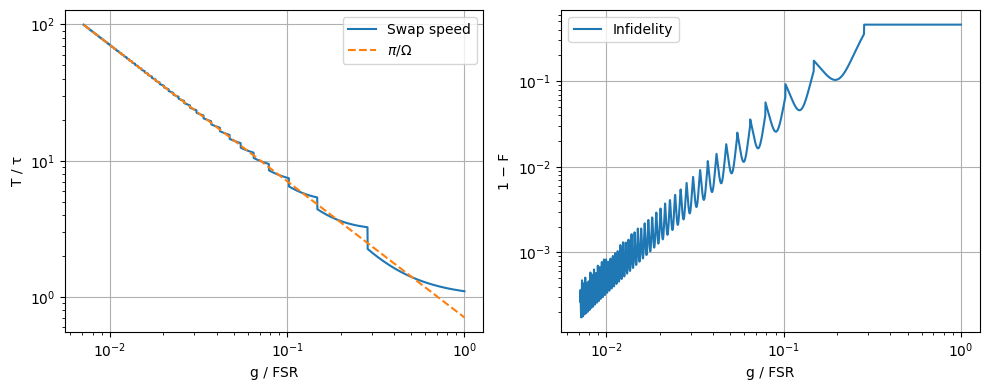

In [1]:
from expt_sets import expt_002_swapspeed
import numpy as np

gamma_list = np.logspace(np.log10(0.001), np.log10(2 * np.pi**2), 2000)
expt_002_swapspeed(Delta=0, gamma_list=gamma_list, overwrite=False, T_max=1.99, T_min=0)

## 3.2 Study the speed and fidelity for different peak
**Conclusion**: 
- There are not obviously different. So I think it is enough to only consider the first peak.

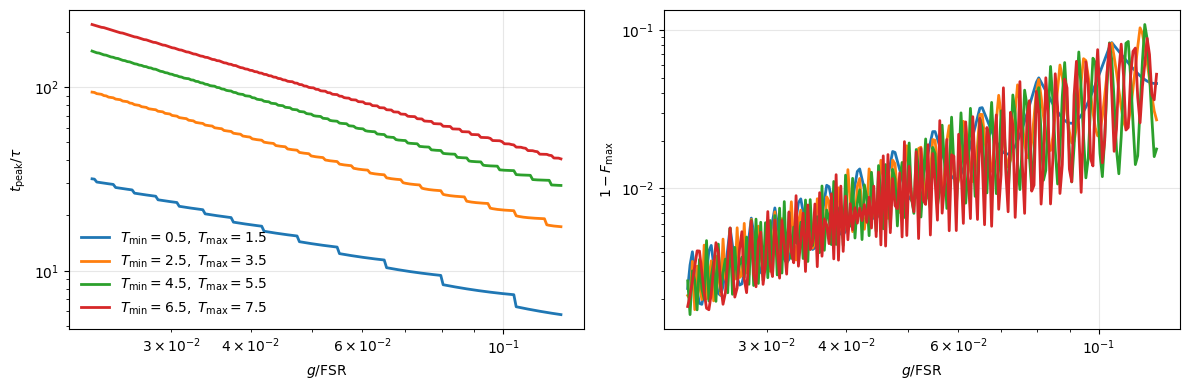

In [ ]:
from expt_sets import expt_003_compare_peaks
import numpy as np

expt_003_compare_peaks(
    Delta=0,
    gamma_list=np.logspace(np.log10(0.01), np.log10(0.3), 200),
    T_min_max_list=[
        (0.5, 1.5),
        (2.5, 3.5),
        (4.5, 5.5),
        (6.5, 7.5),
    ],
)


# 4. DDE with time-depending coupling

We need to test the performance of the DDE under time-dependent couplings and to compare quantum state transfer driven by time-dependent pulse control with passive state transfer based on constant-coupling swap schemes. Therefore, it is necessary to develop a DDE integrator that supports time-dependent couplings.
**Conclusion**:
- Test the stirap protcol with $g_1 = g_0 \sin (\pi t/T ), g_2 = g_0 \cos (\pi t/T )$
- Test the pulse with delay
\begin{align}
g_1(t)=&
\begin{cases}
g_0 \sin (\pi t/T ), & t>T \\
g_0, & t\le 0
\end{cases}\\
g_2(t)=&
\begin{cases}
g_0 , & t\le \tau \\
g_0\cos (\pi t/T ), & t\ge \tau
\end{cases}\\
\end{align}


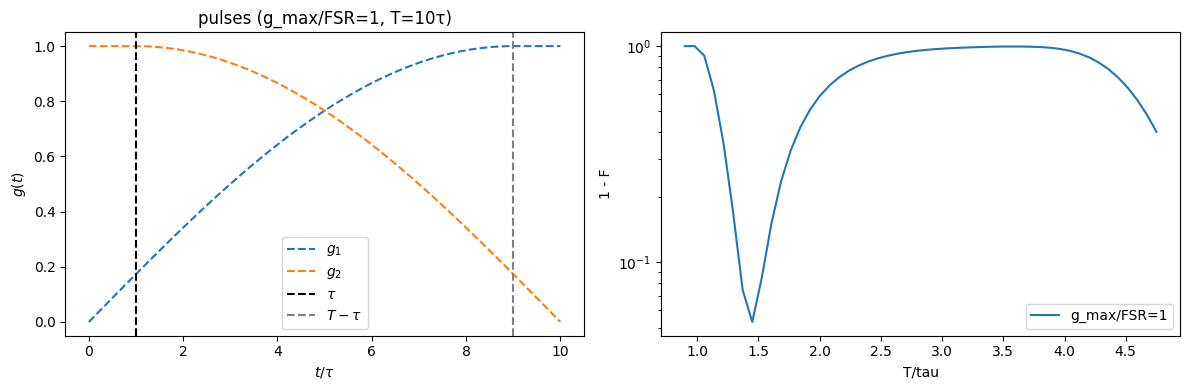

In [ ]:
from expt_sets import expt_004_stirap_T_scan
import numpy as np

gamma = 2 * np.pi**2
T_list = np.linspace(0.9, 10 / np.sqrt(gamma) + 2.5, 50)
F = expt_004_stirap_T_scan(
    gamma=gamma,
    T_list=T_list,
    phi=0.0,
    tau=1.0,
    dt_max=0.01,
    n_jobs=-1,
    pulse_delay=True,
)

[info] load cache: expt_008_cache11.npz


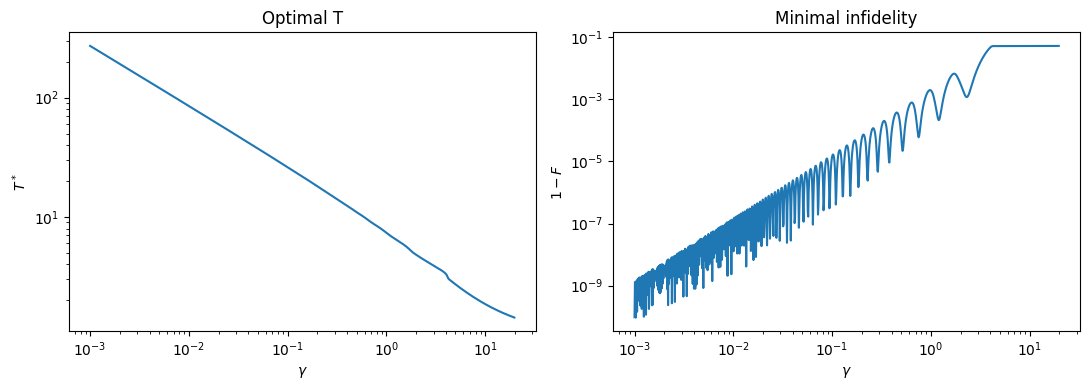

In [1]:
from expt_sets import expt_008_ScanGamma_Refined
import numpy as np

gamma_list = np.logspace(np.log10(0.001), np.log10(2 * np.pi**2), 1000)
expt_008_ScanGamma_Refined(
    gamma_list,
    T_range=None,
    phi=0.0,
    tau=1.0,
    dt_max=0.01,
    pulse_delay=True,
    n_jobs=-1,
    plot=True,
    cache_file="expt_008_cache11.npz",
    overwrite=False,
)

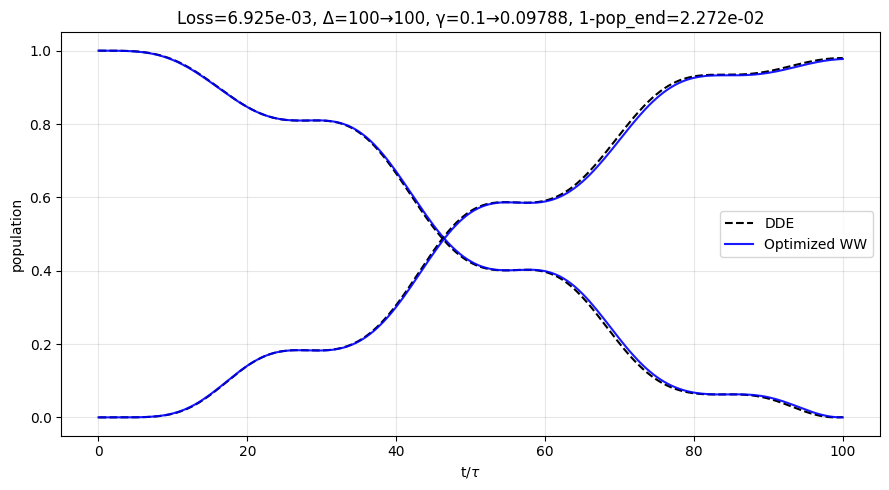

np.float64(0.02272402570981291)

In [5]:
from expt_sets import renormalize_WW_opimized

renormalize_WW_opimized(
    gamma_guess=0.1,
    T=100,
    Delta_guess=100.0,
    tau=1.0,
    dt_max=0.01,
    pulse_delay=True,
    PBC=False,
    n_modes=101,
    n_steps=201,
    plot=True,
    opt=True,
)

In [ ]:
from expt_sets import expt_009_renormalized_WW_fidelity

expt_009_renormalized_WW_fidelity(idx_gamma=(400, 600, 800), n_jobs=-1)

Saved to expt_009_renormalized_WW_fidelity.npz  (N=9)


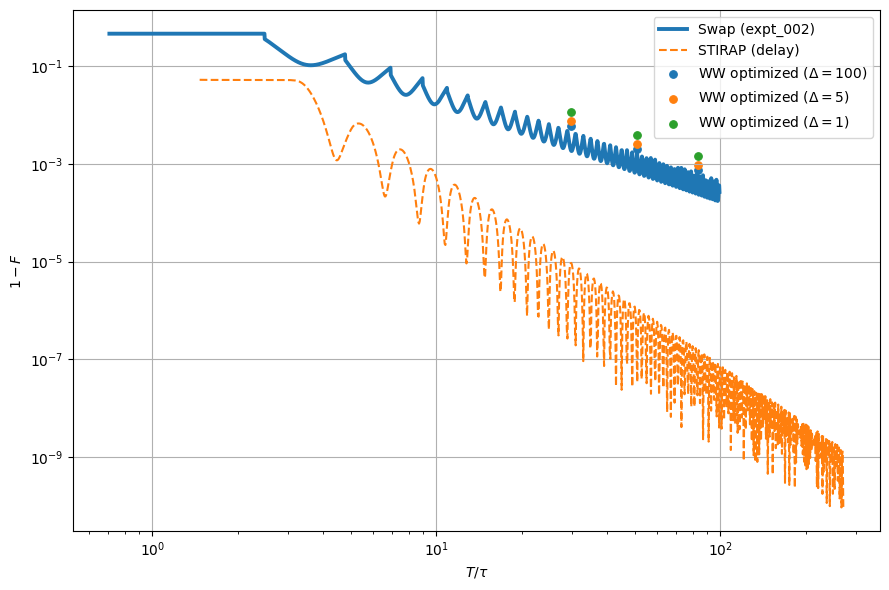

In [2]:
from expt_sets import plot_IF_vs_T

plot_IF_vs_T(
    data0="expt_002_cache.npz",
    data1="expt_008_cache11.npz",
    ww_data="expt_009_renormalized_WW_fidelity.npz",
)